Using boilerpipe to extract the text from a web page

In [2]:
# code referenced from https://github.com/mikhailklassen/Mining-the-Social-Web-3rd-Edition/blob/master/notebooks/Chapter%206%20-%20Mining%20Web%20Pages.ipynb
# May also require the installation of Java runtime libraries
# pip install boilerpipe3 didn't work so installed directly from https://github.com/misja/python-boilerpipe
from boilerpipe.extract import Extractor

# If you're interested, learn more about how Boilerpipe works by reading
# Christian Kohlschütter's paper: http://www.l3s.de/~kohlschuetter/boilerplate/

URL='https://www.oreilly.com/ideas/ethics-in-data-project-design-its-about-planning'

extractor = Extractor(extractor='ArticleExtractor', url=URL)

print(extractor.getText())

Anna Lauren Hoffman will present an online training course, Data Ethics: Designing for Fairness in the Age of Algorithms , October 4-5, 2016. Register now for hands-on practice seeing the warning signs early in your design process.
When I explain the value of ethics to students and professionals alike, I refer it as an “orientation.” As any good designer, scientist, or researcher knows, how you orient yourself toward a problem can have a big impact on the sort of solution you develop—and how you get there. As Ralph Waldo Emerson once wrote , “perception is not whimsical, but fatal.” Your particular perspective, knowledge of, and approach to a problem shapes your solution, opening up certain paths forward and forestalling others.
Data-driven approaches to business help optimize measurable outcomes—but the early planning of a project needs to account for the ethical (and in many cases, the literal) landscape to avoid ethically treacherous territory. Several recent cases in the news illus

In [3]:
URL='https://www.cbssports.com/nba/news/nba-playoffs-2019-predictions-brackets-experts-pick-warriors-to-win-title-again-split-on-who-theyll-face-in-finals/'

extractor = Extractor(extractor='ArticleExtractor', url=URL)

print(extractor.getText())

May 31, 2019             at                          12:20 am ET
• 2 min read
The NBA Finals tipped off on Thursday night in Toronto, Ontario, Canada as the Raptors won their first ever game in the NBA Finals by taking down the Golden State Warriors by the score of 118-109. 
In the end, the biggest star of the night was none other than Pascal Siakam as the likely winner of the league's Most Improved Player award converted on 14 of his 17 attempts from the field for a team-high 32 points to go along with eight rebounds and five assists. 
Kawhi Leonard made his presence felt as well by contributing 23 points of his own to go along with eight rebounds and five assists while Marc Gasol had his best game of the postseason by finishing with 20 points on just 10 attempts from the field. 
Stephen Curry poured in 34 points for the Warriors in the loss but, in the end, it was not enough to get the job done for the defending champions as they dropped their first game in the NBA Finals since 2017.

Naive sentence detection based on periods

In [4]:
text = "Mr. Green killed Colonel Mustard in the study with the candlestick. Mr. Green is not a very nice fellow."
print(text.split("."))

# more examples
ex1 = "Kawhi Leonard is carrying his team in the NBA playoffs. Lionel Messi is the best soccer player."
print(ex1.split("."))

['Mr', ' Green killed Colonel Mustard in the study with the candlestick', ' Mr', ' Green is not a very nice fellow', '']
['Kawhi Leonard is carrying his team in the NBA playoffs', ' Lionel Messi is the best soccer player', '']


More sophisticated sentence detection

In [5]:
import nltk # Installation instructions: http://www.nltk.org/install.html
# installed ghostscript https://stackoverflow.com/questions/36942270/nltk-was-unable-to-find-the-gs-file
# Downloading nltk packages used in this example
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jakehwang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
sentences = nltk.tokenize.sent_tokenize(text)
print(sentences)

ex1sentences = nltk.tokenize.sent_tokenize(ex1)
print(ex1sentences)

['Mr. Green killed Colonel Mustard in the study with the candlestick.', 'Mr. Green is not a very nice fellow.']
['Kawhi Leonard is carrying his team in the NBA playoffs.', 'Lionel Messi is the best soccer player.']


In [7]:
harder_example = """My name is John Smith and my email address is j.smith@company.com.
Mostly people call Mr. Smith. But I actually have a Ph.D.!
Can you believe it? Neither can most people..."""

sentences = nltk.tokenize.sent_tokenize(harder_example)
print(sentences)

['My name is John Smith and my email address is j.smith@company.com.', 'Mostly people call Mr. Smith.', 'But I actually have a Ph.D.!', 'Can you believe it?', 'Neither can most people...']


Word tokenization

In [8]:
text = "Mr. Green killed Colonel Mustard in the study with the candlestick. Mr. Green is not a very nice fellow."
sentences = nltk.tokenize.sent_tokenize(text)
ex1 = "Kawhi Leonard is carrying his team in the NBA playoffs. Lionel Messi is the best soccer player."
sentences2 = nltk.tokenize.sent_tokenize(ex1)

tokens = [nltk.word_tokenize(s) for s in sentences]
tokens2 = [nltk.word_tokenize(s) for s in sentences2]
print(tokens)
print(tokens2)

[['Mr.', 'Green', 'killed', 'Colonel', 'Mustard', 'in', 'the', 'study', 'with', 'the', 'candlestick', '.'], ['Mr.', 'Green', 'is', 'not', 'a', 'very', 'nice', 'fellow', '.']]
[['Kawhi', 'Leonard', 'is', 'carrying', 'his', 'team', 'in', 'the', 'NBA', 'playoffs', '.'], ['Lionel', 'Messi', 'is', 'the', 'best', 'soccer', 'player', '.']]


Part of speech tagging for tokens

In [9]:
# Downloading nltk packages used in this example
nltk.download('maxent_treebank_pos_tagger')
# Download averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger')

pos_tagged_tokens = [nltk.pos_tag(t) for t in tokens]
print(pos_tagged_tokens)
pos_tagged_tokens2 = [nltk.pos_tag(t) for t in tokens2]
print(pos_tagged_tokens2)


[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /home/jakehwang/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jakehwang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[[('Mr.', 'NNP'), ('Green', 'NNP'), ('killed', 'VBD'), ('Colonel', 'NNP'), ('Mustard', 'NNP'), ('in', 'IN'), ('the', 'DT'), ('study', 'NN'), ('with', 'IN'), ('the', 'DT'), ('candlestick', 'NN'), ('.', '.')], [('Mr.', 'NNP'), ('Green', 'NNP'), ('is', 'VBZ'), ('not', 'RB'), ('a', 'DT'), ('very', 'RB'), ('nice', 'JJ'), ('fellow', 'NN'), ('.', '.')]]
[[('Kawhi', 'NNP'), ('Leonard', 'NNP'), ('is', 'VBZ'), ('carrying', 'VBG'), ('his', 'PRP$'), ('team', 'NN'), ('in', 'IN'), ('the', 'DT'), ('NBA', 'NNP'), ('playoffs', 'NNS'), ('.', '.')], [('Lionel', 'NNP'), ('Messi', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('best', 'JJS'), ('soccer', 'NN'), ('player', 'NN'), ('.', '.')]]


Named entity extraction/chunking for tokens

In [10]:
# Downloading nltk packages used in this example
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/jakehwang/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/jakehwang/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [11]:
jim = "Jim bought 300 shares of Acme Corp. in 2006."

tokens = nltk.word_tokenize(jim)
jim_tagged_tokens = nltk.pos_tag(tokens)

ne_chunks = nltk.chunk.ne_chunk(jim_tagged_tokens)

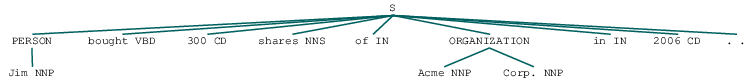

In [12]:
# https://stackoverflow.com/questions/29332851/what-does-nn-vbd-in-dt-nns-rb-means-in-nltk
# reference for the meaning of the links
ne_chunks

In [13]:
messi = "Messi is the best soccer player."

tokens = nltk.word_tokenize(messi)
messi_tagged_tokens = nltk.pos_tag(tokens)

ne_chunks = nltk.chunk.ne_chunk(messi_tagged_tokens)

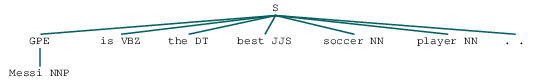

In [14]:
ne_chunks

In [15]:
ne_chunks = [nltk.chunk.ne_chunk(ptt) for ptt in pos_tagged_tokens]

ne_chunks[0].pprint()
ne_chunks[1].pprint()

(S
  (PERSON Mr./NNP)
  (PERSON Green/NNP)
  killed/VBD
  (ORGANIZATION Colonel/NNP Mustard/NNP)
  in/IN
  the/DT
  study/NN
  with/IN
  the/DT
  candlestick/NN
  ./.)
(S
  (PERSON Mr./NNP)
  (ORGANIZATION Green/NNP)
  is/VBZ
  not/RB
  a/DT
  very/RB
  nice/JJ
  fellow/NN
  ./.)


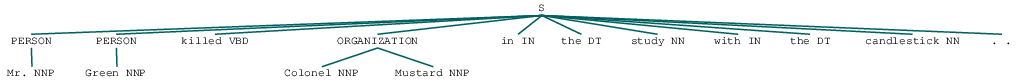

In [16]:
ne_chunks[0]

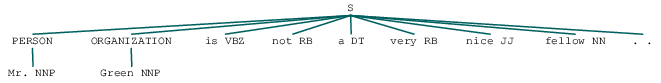

In [17]:
ne_chunks[1]

In [18]:
ne_chunks = [nltk.chunk.ne_chunk(ptt) for ptt in pos_tagged_tokens2]

ne_chunks[0].pprint()
ne_chunks[1].pprint()

(S
  (PERSON Kawhi/NNP)
  (PERSON Leonard/NNP)
  is/VBZ
  carrying/VBG
  his/PRP$
  team/NN
  in/IN
  the/DT
  (ORGANIZATION NBA/NNP)
  playoffs/NNS
  ./.)
(S
  (PERSON Lionel/NNP)
  (ORGANIZATION Messi/NNP)
  is/VBZ
  the/DT
  best/JJS
  soccer/NN
  player/NN
  ./.)


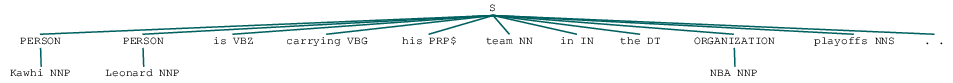

In [19]:
ne_chunks[0]

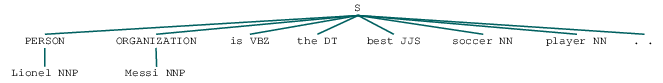

In [20]:
ne_chunks[1]

Using feedparser to extract the text from a web page

In [21]:
import feedparser # conda install feedparser

FEED_URL='http://feeds.feedburner.com/oreilly/radar/atom'

fp = feedparser.parse(FEED_URL)

for e in fp.entries:
    print(e.title)
    print(e.links[0].href)
    print(e.content[0].value)

ModuleNotFoundError: No module named 'feedparser'

Harvesting blog data by parsing feeds

In [93]:
import os
import sys
import json
import feedparser
from bs4 import BeautifulSoup
from nltk import clean_html

FEED_URL = 'http://feeds.feedburner.com/oreilly/radar/atom'

def cleanHtml(html):
    if html == "": return ""

    return BeautifulSoup(html, 'html5lib').get_text()

fp = feedparser.parse(FEED_URL)

# counting number of blog articles
print("Fetched {0} entries from '{1}'".format(len(fp.entries[0].title), fp.feed.title))

blog_posts = []
for e in fp.entries:
    blog_posts.append({'title': e.title, 'content'
                      : cleanHtml(e.content[0].value), 'link': e.links[0].href})
# write title, content, and link into feed.json
out_file = os.path.join('feed.json')
f = open(out_file, 'w+')
f.write(json.dumps(blog_posts, indent=1))
f.close()

print('Wrote output file to {0}'.format(f.name))

Fetched 29 entries from 'All - O'Reilly Media'
Wrote output file to feed.json


Using NLTK's NLP tools to process human language in blog data

In [94]:
import json
import nltk

BLOG_DATA = "./feed.json"

blog_data = json.loads(open(BLOG_DATA).read())

# Download nltk packages used in this example
nltk.download('stopwords')

# Customize your list of stopwords as needed. Here, we add common
# punctuation and contraction artifacts.

stop_words = nltk.corpus.stopwords.words('english') + [
    '.',
    ',',
    '--',
    '\'s',
    '?',
    ')',
    '(',
    ':',
    '\'',
    '\'re',
    '"',
    '-',
    '}',
    '{',
    u'—',
    ']',
    '[',
    '...'
    ]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiwookim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
# Tokenize sentences
for post in blog_data:
    sentences = nltk.tokenize.sent_tokenize(post['content'])

    words = [w.lower() for sentence in sentences for w in
             nltk.tokenize.word_tokenize(sentence)]

    fdist = nltk.FreqDist(words)

    # Remove stopwords from fdist
    for sw in stop_words:
        del fdist[sw]
   
    # Basic stats
    num_words = sum([i[1] for i in fdist.items()])
    num_unique_words = len(fdist.keys())

    # Hapaxes are words that appear only once
    num_hapaxes = len(fdist.hapaxes())

    top_10_words_sans_stop_words = fdist.most_common(10)

    print(post['title'])
    print('\tNum Sentences:'.ljust(25), len(sentences))
    print('\tNum Words:'.ljust(25), num_words)
    print('\tNum Unique Words:'.ljust(25), num_unique_words)
    print('\tNum Hapaxes:'.ljust(25), num_hapaxes)
    print('\tTop 10 Most Frequent Words:\n\t\t', \
          '\n\t\t'.join(['{0} ({1})'.format(w[0], w[1]) for w in top_10_words_sans_stop_words]))
    print()

Four short links: 20 May 2019
	Num Sentences:           11
	Num Words:               146
	Num Unique Words:        100
	Num Hapaxes:             73
	Top 10 Most Frequent Words:
		 % (6)
		unix (5)
		time (5)
		attacks (4)
		debugging (4)
		conversational (3)
		machine (3)
		learning (3)
		false (3)
		testing (3)

Four short links: 17 May 2019
	Num Sentences:           11
	Num Words:               153
	Num Unique Words:        127
	Num Hapaxes:             107
	Top 10 Most Frequent Words:
		 found (4)
		time (4)
		networks (3)
		via (3)
		productsec (2)
		sparse (2)
		neural (2)
		christchurch (2)
		call (2)
		six (2)

Four short links: 16 May 2019
	Num Sentences:           9
	Num Words:               86
	Num Unique Words:        75
	Num Hapaxes:             66
	Top 10 Most Frequent Words:
		 amazon (3)
		love (3)
		regulating (2)
		platforms (2)
		development (2)
		still (2)
		tech (2)
		cheatsheets (2)
		challenge (2)
		ml (1)

The topics to watch in software architecture
	Num Sentenc

Stablecoins: Solving the cryptocurrency volatility crisis
	Num Sentences:           124
	Num Words:               1832
	Num Unique Words:        896
	Num Hapaxes:             562
	Top 10 Most Frequent Words:
		 stablecoins (33)
		stablecoin (28)
		’ (22)
		price (18)
		volatility (16)
		backed (16)
		system (16)
		users (15)
		assets (15)
		asset (15)

Four short links: 25 April 2019
	Num Sentences:           18
	Num Words:               269
	Num Unique Words:        216
	Num Hapaxes:             181
	Top 10 Most Frequent Words:
		 brain (5)
		scooters (4)
		change (4)
		may (4)
		; (4)
		values (3)
		business (3)
		used (3)
		via (3)
		say (3)

Four short links: 24 April 2019
	Num Sentences:           8
	Num Words:               129
	Num Unique Words:        98
	Num Hapaxes:             80
	Top 10 Most Frequent Words:
		 model (4)
		’ (4)
		control (3)
		glitch (3)
		media (3)
		server (3)
		crispr (3)
		organisms (3)
		users (3)
		want (3)

Four short links: 23 April 2019
	Num Senten

A document summarization algorithm based principally upon sentence
detection and frequency analysis within sentences

In [97]:
import json
import nltk
import numpy

BLOG_DATA = "feed.json"

blog_data = json.loads(open(BLOG_DATA).read())

N = 100  # Number of words to consider
CLUSTER_THRESHOLD = 5  # Distance between words to consider
TOP_SENTENCES = 5  # Number of sentences to return for a "top n" summary

In [98]:
stop_words = nltk.corpus.stopwords.words('english') + [
    '.',
    ',',
    '--',
    '\'s',
    '?',
    ')',
    '(',
    ':',
    '\'',
    '\'re',
    '"',
    '-',
    '}',
    '{',
    u'—',
    '>',
    '<',
    '...'
    ]

In [99]:
# Approach taken from "The Automatic Creation of Literature Abstracts" by H.P. Luhn
def _score_sentences(sentences, important_words):
    scores = []
    sentence_idx = 0

    for s in [nltk.tokenize.word_tokenize(s) for s in sentences]:

        word_idx = []

        # For each word in the word list...
        for w in important_words:
            try:
                # Compute an index for where any important words occur in the sentence.
                word_idx.append(s.index(w))
            except ValueError: # w not in this particular sentence
                pass

        word_idx.sort()

        # It is possible that some sentences may not contain any important words at all.
        if len(word_idx)== 0: continue

        # Using the word index, compute clusters by using a max distance threshold
        # for any two consecutive words.

        clusters = []
        cluster = [word_idx[0]]
        i = 1
        while i < len(word_idx):
            if word_idx[i] - word_idx[i - 1] < CLUSTER_THRESHOLD:
                cluster.append(word_idx[i])
            else:
                clusters.append(cluster[:])
                cluster = [word_idx[i]]
            i += 1
        clusters.append(cluster)

        # Score each cluster. The max score for any given cluster is the score 
        # for the sentence.

        max_cluster_score = 0
        
        for c in clusters:
            significant_words_in_cluster = len(c)
            # true clusters also contain insignificant words, so we get 
            # the total cluster length by checking the indices
            total_words_in_cluster = c[-1] - c[0] + 1
            score = 1.0 * significant_words_in_cluster**2 / total_words_in_cluster

            if score > max_cluster_score:
                max_cluster_score = score

        scores.append((sentence_idx, max_cluster_score))
        sentence_idx += 1

    return scores

In [100]:
def summarize(txt):
    sentences = [s for s in nltk.tokenize.sent_tokenize(txt)]
    normalized_sentences = [s.lower() for s in sentences]

    words = [w.lower() for sentence in normalized_sentences for w in
             nltk.tokenize.word_tokenize(sentence)]

    fdist = nltk.FreqDist(words)
    
    # Remove stopwords from fdist
    for sw in stop_words:
        del fdist[sw]

    top_n_words = [w[0] for w in fdist.most_common(N)]

    scored_sentences = _score_sentences(normalized_sentences, top_n_words)

    # Summarization Approach 1:
    # Filter out nonsignificant sentences by using the average score plus a
    # fraction of the std dev as a filter

    avg = numpy.mean([s[1] for s in scored_sentences])
    std = numpy.std([s[1] for s in scored_sentences])
    mean_scored = [(sent_idx, score) for (sent_idx, score) in scored_sentences
                   if score > avg + 0.5 * std]

    # Summarization Approach 2:
    # Another approach would be to return only the top N ranked sentences

    top_n_scored = sorted(scored_sentences, key=lambda s: s[1])[-TOP_SENTENCES:]
    top_n_scored = sorted(top_n_scored, key=lambda s: s[0])

    # Decorate the post object with summaries

    return dict(top_n_summary=[sentences[idx] for (idx, score) in top_n_scored],
                mean_scored_summary=[sentences[idx] for (idx, score) in mean_scored])

In [101]:
for post in blog_data: 
    post.update(summarize(post['content']))

    print(post['title'])
    print('=' * len(post['title']))
    print()
    print('Top N Summary')
    print('-------------')
    print(' '.join(post['top_n_summary']))
    print()
    print('Mean Scored Summary')
    print('-------------------')
    print(' '.join(post['mean_scored_summary']))
    print()

Four short links: 20 May 2019

Top N Summary
-------------
Account Hygiene, Conversational AI Playbook, Unix Time Falsehoods, and Testing/Debugging Machine Learning

Basic Account Hygiene to Prevent Hijacking (Google) -- SMS 2FA  blocked 100% of automated bots, 96% of bulk phishing attacks, and 76% of targeted attacks. On-device prompts, a more secure replacement for SMS, helped prevent 100% of automated bots, 99% of bulk phishing attacks and 90% of targeted attacks. Conversational AI Playbook -- The detailed instructions, practical advice, and real-world examples provided here should empower developers to improve the quality and variety of conversational experiences of the coming months and years. Falsehoods Programmers Believe about Unix Time -- These three facts all seem eminently sensible and reasonable, right? Unix time is the number of seconds since 1 January 1970 00:00:00 UTC.

Mean Scored Summary
-------------------
Account Hygiene, Conversational AI Playbook, Unix Time Falseho

Highlights from the Strata Data Conference in London 2019

Top N Summary
-------------
Watch highlights from expert talks covering machine learning, predictive analytics, data regulation, and more.People from across the data world came together in London for the Strata Data Conference. Finding your North Star

Cait O’Riordan discusses the North Star metric the Financial Times uses to drive subscriber growth. Sustaining machine learning in the enterprise

Drawing insights from recent surveys, Ben Lorica analyzes important trends in machine learning. Privacy, identity, and autonomy in the age of big data and AI

Sandra Wachter argues that a right to reasonable inferences could protect against new forms of discrimination. Building data science capacity in your organization

Shingai Manjengwa shares insights from teaching data science to 300,000 online learners.

Mean Scored Summary
-------------------
Watch highlights from expert talks covering machine learning, predictive analytics, data

Four short links: 26 April 2019

Top N Summary
-------------
Simplify Gmail, Watch Web Pages, Easy Debugging, and Sleep Deprivation

Simplify -- A Chrome extension that brings the simplicity of Google Inbox to Gmail. It's appropriate for research use cases where you want to track changes in one or more pages over time. WatchMe also comes with psutils [Python system and process utilities] (system tasks) built in to allow for monitoring of system resources. PySnooper -- instead of carefully crafting the right print lines, you just add one decorator line to the function you're interested in. There is notable evidence that the developers’ engagement and their prowess to apply TFD [test-first development] are negatively impacted.

Mean Scored Summary
-------------------
Simplify Gmail, Watch Web Pages, Easy Debugging, and Sleep Deprivation

Simplify -- A Chrome extension that brings the simplicity of Google Inbox to Gmail. WatchMe also comes with psutils [Python system and process utilities

Highlights from the O'Reilly Artificial Intelligence Conference in New York 2019

Top N Summary
-------------
Watch highlights from expert talks covering AI, machine learning, deep learning, ethics, and more.People from across the AI world came together in New York for the O'Reilly Artificial Intelligence Conference. Fast, flexible, and functional: 4 real-world AI deployments at enterprise scale

Gadi Singer discusses the major questions organizations confront as they integrate deep learning. Watch "Fast, flexible, and functional: 4 real-world AI deployments at enterprise scale." Watch "Making real-world distributed deep learning easy with Nauta." Watch "Toward ethical AI: Inclusivity as a messy, difficult, but promising answer."

Mean Scored Summary
-------------------
Watch highlights from expert talks covering AI, machine learning, deep learning, ethics, and more.People from across the AI world came together in New York for the O'Reilly Artificial Intelligence Conference. Watch "Dec

Visualizing document summarization results with HTML output

In [102]:
import os
from IPython.display import IFrame
from IPython.core.display import display

HTML_TEMPLATE = """<html>
    <head>
        <title>{0}</title>
        <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>
    </head>
    <body>{1}</body>
</html>"""

for post in blog_data:
   
    # Uses previously defined summarize function.
    post.update(summarize(post['content']))

    # You could also store a version of the full post with key sentences marked up
    # for analysis with simple string replacement...

    for summary_type in ['top_n_summary', 'mean_scored_summary']:
        post[summary_type + '_marked_up'] = '<p>{0}</p>'.format(post['content'])
        
        for s in post[summary_type]:
            post[summary_type + '_marked_up'] = \
            post[summary_type + '_marked_up'].replace(s, '<strong>{0}</strong>'.format(s))

        filename = post['title'].replace("?", "") + '.summary.' + summary_type + '.html'
        
        f = open(os.path.join(filename), 'wb')
        html = HTML_TEMPLATE.format(post['title'] + ' Summary', post[summary_type + '_marked_up'])    
        f.write(html.encode('utf-8'))
        f.close()

        print("Data written to", f.name)

# Display any of these files with an inline frame. This displays the
# last file processed by using the last value of f.name...
print()
print("Displaying {0}:".format(f.name))
display(IFrame('files/{0}'.format(f.name), '100%', '600px'))

Data written to Four short links: 20 May 2019.summary.top_n_summary.html
Data written to Four short links: 20 May 2019.summary.mean_scored_summary.html
Data written to Four short links: 17 May 2019.summary.top_n_summary.html
Data written to Four short links: 17 May 2019.summary.mean_scored_summary.html
Data written to Four short links: 16 May 2019.summary.top_n_summary.html
Data written to Four short links: 16 May 2019.summary.mean_scored_summary.html
Data written to The topics to watch in software architecture.summary.top_n_summary.html
Data written to The topics to watch in software architecture.summary.mean_scored_summary.html
Data written to Four short links: 15 May 2019.summary.top_n_summary.html
Data written to Four short links: 15 May 2019.summary.mean_scored_summary.html
Data written to How AI and machine learning are improving customer experience.summary.top_n_summary.html
Data written to How AI and machine learning are improving customer experience.summary.mean_scored_summary

Data written to Making real-world distributed deep learning easy with Nauta.summary.mean_scored_summary.html
Data written to Four short links: 18 April 2019.summary.top_n_summary.html
Data written to Four short links: 18 April 2019.summary.mean_scored_summary.html
Data written to Automated ML: A journey from CRISPR.ML to Azure ML.summary.top_n_summary.html
Data written to Automated ML: A journey from CRISPR.ML to Azure ML.summary.mean_scored_summary.html
Data written to Toward ethical AI: Inclusivity as a messy, difficult, but promising answer.summary.top_n_summary.html
Data written to Toward ethical AI: Inclusivity as a messy, difficult, but promising answer.summary.mean_scored_summary.html
Data written to Machine learning for personalization.summary.top_n_summary.html
Data written to Machine learning for personalization.summary.mean_scored_summary.html
Data written to Is AI human-ready.summary.top_n_summary.html
Data written to Is AI human-ready.summary.mean_scored_summary.html
Data 

Extracting entities from a text with NLTK

In [104]:
import nltk
import json

BLOG_DATA = "feed.json"

blog_data = json.loads(open(BLOG_DATA).read())

for post in blog_data:

    sentences = nltk.tokenize.sent_tokenize(post['content'])
    tokens = [nltk.tokenize.word_tokenize(s) for s in sentences]
    pos_tagged_tokens = [nltk.pos_tag(t) for t in tokens]

    # Flatten the list since we're not using sentence structure
    # and sentences are guaranteed to be separated by a special
    # POS tuple such as ('.', '.')

    pos_tagged_tokens = [token for sent in pos_tagged_tokens for token in sent]

    all_entity_chunks = []
    previous_pos = None
    current_entity_chunk = []
    for (token, pos) in pos_tagged_tokens:

        if pos == previous_pos and pos.startswith('NN'):
            current_entity_chunk.append(token)
        elif pos.startswith('NN'):
            
            if current_entity_chunk != []:
                
                # Note that current_entity_chunk could be a duplicate when appended,
                # so frequency analysis again becomes a consideration

                all_entity_chunks.append((' '.join(current_entity_chunk), pos))
            current_entity_chunk = [token]

        previous_pos = pos

    # Store the chunks as an index for the document
    # and account for frequency while we're at it...

    post['entities'] = {}
    for c in all_entity_chunks:
        post['entities'][c] = post['entities'].get(c, 0) + 1

    # For example, we could display just the title-cased entities

    print(post['title'])
    print('-' * len(post['title']))
    proper_nouns = []
    for (entity, pos) in post['entities']:
        if entity.istitle():
            print('\t{0} ({1})'.format(entity, post['entities'][(entity, pos)]))
    print()

Four short links: 20 May 2019
-----------------------------
	Account Hygiene (1)
	Unix Time Falsehoods (1)
	Testing/Debugging Machine Learning Basic Account Hygiene (1)
	Hijacking (1)
	Google (2)
	Falsehoods Programmers (1)
	Unix Time (1)
	January (1)
	Unix (1)
	False (1)
	Machine Learning (1)
	Continue (1)

Four short links: 17 May 2019
-----------------------------
	Productsec (1)
	Supply Chain Attack (1)
	Sparse Neural Networks (1)
	Christchurch Call Six Buckets (1)
	Productsec (1)
	Found (1)
	Bruce Schneier (1)
	Bruce Schneier (1)
	Lottery Ticket Hypothesis (1)
	Finding Sparse (1)
	Trainable Neural Networks (1)
	Christchurch Call (1)
	Continue (1)

Four short links: 16 May 2019
-----------------------------
	Platforms (1)
	Amazon Development (1)
	Love Tech (2)
	Platform Challenge (1)
	Alex Stamos (1)
	Must (1)
	Amazon (1)
	Away Teams (1)
	Amazon (1)
	Simon Willison (1)
	Wired (1)
	Machine Learning Cheatsheets (1)
	Continue (1)

The topics to watch in software architecture
---------

Four short links: 1 May 2019
----------------------------
	Intermediate Vim (1)
	Newsletter Numbers (1)
	Automating Assessment (1)
	Financial Modeling Intermediate Vim (1)
	Newsletters (1)
	Buzzfeed (1)
	Substack ’ (1)
	Substack (1)
	Final Draft (1)
	Assess Against Bechdel Test (1)
	Thursday (1)
	Inclusivity Analysis ” (1)
	Bechdel Test (1)
	Marginal Revolution (1)
	How (1)
	Industry Financial Modelers (1)
	Disease (1)
	Today (1)
	Continue (1)

Looking Back on the O’Reilly Artificial Intelligence Conference
---------------------------------------------------------------
	O'Reilly (3)
	Artificial Intelligence Conference (1)
	New York (1)
	Intel (2)
	Gadi Singer (1)
	Machine (1)
	Aleksander Madry (1)
	Madry (2)
	Danielle Dean (1)
	Microsoft (1)
	Stanford (1)
	Chris Ré (1)
	Snorkel (1)
	Advanced (1)
	Dean (1)
	Nauta (1)
	Researchers (1)
	Mechanical Turk (1)
	Flickr (1)
	Ré (1)
	Snorkel (1)
	Olga Troyanska (1)
	Martial Hebert (1)
	Gourley (1)
	Primer (1)
	Andrew Zaldivar (1)
	Google Jigsaw

Discovering interactions between entities

In [105]:
import nltk
import json

BLOG_DATA = "feed.json"

def extract_interactions(txt):
    sentences = nltk.tokenize.sent_tokenize(txt)
    tokens = [nltk.tokenize.word_tokenize(s) for s in sentences]
    pos_tagged_tokens = [nltk.pos_tag(t) for t in tokens]

    entity_interactions = []
    for sentence in pos_tagged_tokens:

        all_entity_chunks = []
        previous_pos = None
        current_entity_chunk = []

        for (token, pos) in sentence:

            if pos == previous_pos and pos.startswith('NN'):
                current_entity_chunk.append(token)
            elif pos.startswith('NN'):
                if current_entity_chunk != []:
                    all_entity_chunks.append((' '.join(current_entity_chunk),
                            pos))
                current_entity_chunk = [token]

            previous_pos = pos

        if len(all_entity_chunks) > 1:
            entity_interactions.append(all_entity_chunks)
        else:
            entity_interactions.append([])

    assert len(entity_interactions) == len(sentences)

    return dict(entity_interactions=entity_interactions,
                sentences=sentences)

blog_data = json.loads(open(BLOG_DATA).read())

# Display selected interactions on a per-sentence basis

for post in blog_data:

    post.update(extract_interactions(post['content']))

    print(post['title'])
    print('-' * len(post['title']))
    for interactions in post['entity_interactions']:
        print('; '.join([i[0] for i in interactions]))
    print()

Four short links: 20 May 2019
-----------------------------
Account Hygiene; Conversational AI Playbook; Unix Time Falsehoods; Testing/Debugging Machine Learning Basic Account Hygiene; Hijacking; Google; %; bots; %; bulk; attacks; %
On-device; prompts; replacement; SMS; %; bots; %; bulk; attacks; %
Conversational AI Playbook; instructions; advice; examples; developers; quality; variety; experiences; months
Falsehoods Programmers; Unix Time
time; number; seconds; January
second; Unix; time; advances


Machine Learning; Google; machine; systems differs
course; model; way; pipeline
Continue; links

Four short links: 17 May 2019
-----------------------------
Productsec; Supply Chain Attack; Sparse Neural Networks; Christchurch Call Six Buckets; Productsec; buckets; security bug; journey; life; Prevented—best; outcome
analysis; tools; “
time; set; bugs
Found; bug bounty; users; risk; time cost


ShadowHammer; Bruce Schneier; thread; cases; attackers; certificates; victims; development
Bruce

Four short links: 9 May 2019
----------------------------
Examples; War Crimes; Open Source Firmware; Better Questions Adversarial Examples Are; Bugs; Features; Adversarial; vulnerability; result; models; sensitivity; features
Tech; Companies; Evidence; War Crimes; Atlantic; information; media; sites; internet; users; perpetrators; algorithms; giants
Facebook; content removal tech; evidence; investigators; war
age; software; college; students; war
Open Source Firmware; Important; Security; Jessie Frazelle; code; visibility

Tukey; Design Thinking; Better Questions; Roger Peng; view; thing; data; scientist; effort; towards; quality; sharpness

Continue; links

Four short links: 8 May 2019
----------------------------
Old Timers; Web Flashback; Software Collapse; Revisions; Paxos Brian Kernighan; Ken Thompson; YouTube; footage
Hypertext; Destiny; Tim Berners-Lee; talk
dream; web; television channel; sea
Daniel G. Siegel; Software Collapse; issue; rot metaphor; blame; piece
software; time

How companies adopt and apply cloud native infrastructure
---------------------------------------------------------
Survey; results; path; organizations; infrastructure; power
need; agility; scaling; resiliency; organizations; decade; “; cloud ”; commitment; cloud
shift; part; trend; Architecture; organizations; combination; cloud; containers; orchestration; microservices; customer; expectations; availability; features
motivations; challenges companies; infrastructure; survey; practitioners; managers; CxOs
Key; findings; survey; %; respondents; lack; skills; challenge; organizations
industry; engineers; tools
%; respondents
approach; data; cloud; architecture; organizations
%; respondents; strategy; vendors; organizations; cloud provider; access; features; cloud
%; respondents; organizations; native; DevOps; teams; organizations; infrastructures; bond; DevOps
respondents; organizations; infrastructure; % use; containers; % use orchestration; tools
signals; Architecture ’; hypothesis; i

Stablecoins: Solving the cryptocurrency volatility crisis
---------------------------------------------------------
volatility problem; groundwork; payment systems.For cryptocurrency; enthusiasts; game; blockchain; ecosystems; platforms; authority; participation
course; effort; culture; source; code; branches; source; trees; living; systems; interaction; access
heart; vision; systems; state; world
visions; swoop; emergence; solutions

nascency; cryptocurrency; markets; volatility; staple; observers
traders; conditions; assets; value; systems
asset; medium; exchange; MoE; value; value
volatility problem; resolution; unlocks; engineering groundwork; secure; payment; systems
Users; systems; peers; rate; increase; security; nature
term; problem; barrier; entry; use; services; consortium; blockchains—truly; automation value
contender; order; crisis
stablecoin; cryptocurrency; means; fiat currency; price; metals
date; stablecoins; currencies; reserve
peg; iterations
Value; opportunity; Digit

Highlights from the O'Reilly Artificial Intelligence Conference in New York 2019
--------------------------------------------------------------------------------
Watch; highlights; talks; AI; machine learning; learning; ethics; more.People; AI; world; New York
links; highlights
AI; robotics; Martial Hebert; overview; challenges; AI; robotics; glimpse; developments
AI; robotics
Applied; machine learning; Facebook Kim Hazelwood; hardware; software; Facebook; scale
Applied; machine learning
genome; machine; mysteries
Olga Troyanskaya; questions; prism

propaganda; Sean Gourley; repercussions; AI-generated; content; line

Software; Snorkel Christopher Ré; Snorkel; system; training; data


Aleksander Madry; roadblocks; AI; impact; approaches

Machine; personalization; Tony Jebara; Netflix; images
Machine; learning
AI; tools; Ben Lorica; Roger Chen; state; AI; technologies
Checking; AI
Fast; real-world; AI; deployments; enterprise scale; Gadi Singer; questions organizations
Fast; real-world;

Visualizing interactions between entities with HTML output

In [106]:
import os
import json
import nltk
from IPython.display import IFrame
from IPython.core.display import display

BLOG_DATA = "feed.json"

HTML_TEMPLATE = """<html>
    <head>
        <title>{0}</title>
        <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>
    </head>
    <body>{1}</body>
</html>"""

blog_data = json.loads(open(BLOG_DATA).read())

for post in blog_data:

    post.update(extract_interactions(post['content']))

    # Display output as markup with entities presented in bold text

    post['markup'] = []

    for sentence_idx in range(len(post['sentences'])):

        s = post['sentences'][sentence_idx]
        for (term, _) in post['entity_interactions'][sentence_idx]:
            s = s.replace(term, '<strong>{0}</strong>'.format(term))

        post['markup'] += [s] 
            
    filename = post['title'].replace("?", "") + '.entity_interactions.html'
    f = open(os.path.join(filename), 'wb')
    html = HTML_TEMPLATE.format(post['title'] + ' Interactions', ' '.join(post['markup']))
    f.write(html.encode('utf-8'))
    f.close()

    print('Data written to', f.name)
    
    # Display any of these files with an inline frame. This displays the
    # last file processed by using the last value of f.name...
    
    print('Displaying {0}:'.format(f.name))
    display(IFrame('files/{0}'.format(f.name), '100%', '600px'))

Data written to Four short links: 20 May 2019.entity_interactions.html
Displaying Four short links: 20 May 2019.entity_interactions.html:


Data written to Four short links: 17 May 2019.entity_interactions.html
Displaying Four short links: 17 May 2019.entity_interactions.html:


Data written to Four short links: 16 May 2019.entity_interactions.html
Displaying Four short links: 16 May 2019.entity_interactions.html:


Data written to The topics to watch in software architecture.entity_interactions.html
Displaying The topics to watch in software architecture.entity_interactions.html:


Data written to Four short links: 15 May 2019.entity_interactions.html
Displaying Four short links: 15 May 2019.entity_interactions.html:


Data written to How AI and machine learning are improving customer experience.entity_interactions.html
Displaying How AI and machine learning are improving customer experience.entity_interactions.html:


Data written to Four short links: 14 May 2019.entity_interactions.html
Displaying Four short links: 14 May 2019.entity_interactions.html:


Data written to Making Facebook a scapegoat is a mistake.entity_interactions.html
Displaying Making Facebook a scapegoat is a mistake.entity_interactions.html:


Data written to Four short links: 13 May 2019.entity_interactions.html
Displaying Four short links: 13 May 2019.entity_interactions.html:


Data written to Toward the next generation of programming tools.entity_interactions.html
Displaying Toward the next generation of programming tools.entity_interactions.html:


Data written to Four short links: 10 May 2019.entity_interactions.html
Displaying Four short links: 10 May 2019.entity_interactions.html:


Data written to Real-time entity resolution made accessible.entity_interactions.html
Displaying Real-time entity resolution made accessible.entity_interactions.html:


Data written to Four short links: 9 May 2019.entity_interactions.html
Displaying Four short links: 9 May 2019.entity_interactions.html:


Data written to Four short links: 8 May 2019.entity_interactions.html
Displaying Four short links: 8 May 2019.entity_interactions.html:


Data written to Four short links: 7 May 2019.entity_interactions.html
Displaying Four short links: 7 May 2019.entity_interactions.html:


Data written to Four short links: 6 May 2019.entity_interactions.html
Displaying Four short links: 6 May 2019.entity_interactions.html:


Data written to Four short links: 3 May 2019.entity_interactions.html
Displaying Four short links: 3 May 2019.entity_interactions.html:


Data written to Rise of the (advertising) machines.entity_interactions.html
Displaying Rise of the (advertising) machines.entity_interactions.html:


Data written to Privacy, identity, and autonomy in the age of big data and AI.entity_interactions.html
Displaying Privacy, identity, and autonomy in the age of big data and AI.entity_interactions.html:


Data written to Building data science capacity in your organization.entity_interactions.html
Displaying Building data science capacity in your organization.entity_interactions.html:


Data written to Combining creativity and analytics.entity_interactions.html
Displaying Combining creativity and analytics.entity_interactions.html:


Data written to The unstoppable rise of white box data.entity_interactions.html
Displaying The unstoppable rise of white box data.entity_interactions.html:


Data written to Four short links: 2 May 2019.entity_interactions.html
Displaying Four short links: 2 May 2019.entity_interactions.html:


Data written to Finding your North Star.entity_interactions.html
Displaying Finding your North Star.entity_interactions.html:


Data written to Highlights from the Strata Data Conference in London 2019.entity_interactions.html
Displaying Highlights from the Strata Data Conference in London 2019.entity_interactions.html:


Data written to Making the future.entity_interactions.html
Displaying Making the future.entity_interactions.html:


Data written to Sustaining machine learning in the enterprise.entity_interactions.html
Displaying Sustaining machine learning in the enterprise.entity_interactions.html:


Data written to Making data science useful.entity_interactions.html
Displaying Making data science useful.entity_interactions.html:


Data written to The enterprise data cloud.entity_interactions.html
Displaying The enterprise data cloud.entity_interactions.html:


Data written to 160+ live online training courses opened for May and June.entity_interactions.html
Displaying 160+ live online training courses opened for May and June.entity_interactions.html:


Data written to Four short links: 1 May 2019.entity_interactions.html
Displaying Four short links: 1 May 2019.entity_interactions.html:


Data written to Looking Back on the O’Reilly Artificial Intelligence Conference.entity_interactions.html
Displaying Looking Back on the O’Reilly Artificial Intelligence Conference.entity_interactions.html:


Data written to Four short links: 30 April 2019.entity_interactions.html
Displaying Four short links: 30 April 2019.entity_interactions.html:


Data written to How companies adopt and apply cloud native infrastructure.entity_interactions.html
Displaying How companies adopt and apply cloud native infrastructure.entity_interactions.html:


Data written to Four short links: 29 April 2019.entity_interactions.html
Displaying Four short links: 29 April 2019.entity_interactions.html:


Data written to Four short links: 26 April 2019.entity_interactions.html
Displaying Four short links: 26 April 2019.entity_interactions.html:


Data written to Why companies are in need of data lineage solutions.entity_interactions.html
Displaying Why companies are in need of data lineage solutions.entity_interactions.html:


Data written to Stablecoins: Solving the cryptocurrency volatility crisis.entity_interactions.html
Displaying Stablecoins: Solving the cryptocurrency volatility crisis.entity_interactions.html:


Data written to Four short links: 25 April 2019.entity_interactions.html
Displaying Four short links: 25 April 2019.entity_interactions.html:


Data written to Four short links: 24 April 2019.entity_interactions.html
Displaying Four short links: 24 April 2019.entity_interactions.html:


Data written to Four short links: 23 April 2019.entity_interactions.html
Displaying Four short links: 23 April 2019.entity_interactions.html:


Data written to Four short links: 22 April 2019.entity_interactions.html
Displaying Four short links: 22 April 2019.entity_interactions.html:


Data written to Four short links: 19 April 2019.entity_interactions.html
Displaying Four short links: 19 April 2019.entity_interactions.html:


Data written to Software 2.0 and Snorkel.entity_interactions.html
Displaying Software 2.0 and Snorkel.entity_interactions.html:


Data written to Automation of AI: Accelerating the AI revolution.entity_interactions.html
Displaying Automation of AI: Accelerating the AI revolution.entity_interactions.html:


Data written to Applied machine learning at Facebook.entity_interactions.html
Displaying Applied machine learning at Facebook.entity_interactions.html:


Data written to Computational propaganda.entity_interactions.html
Displaying Computational propaganda.entity_interactions.html:


Data written to Decoding the human genome with deep learning.entity_interactions.html
Displaying Decoding the human genome with deep learning.entity_interactions.html:


Data written to Simple, scalable, and sustainable: A methodical approach to AI adoption.entity_interactions.html
Displaying Simple, scalable, and sustainable: A methodical approach to AI adoption.entity_interactions.html:


Data written to Artificial intelligence: The “refinery” for data.entity_interactions.html
Displaying Artificial intelligence: The “refinery” for data.entity_interactions.html:


Data written to Making real-world distributed deep learning easy with Nauta.entity_interactions.html
Displaying Making real-world distributed deep learning easy with Nauta.entity_interactions.html:


Data written to Four short links: 18 April 2019.entity_interactions.html
Displaying Four short links: 18 April 2019.entity_interactions.html:


Data written to Automated ML: A journey from CRISPR.ML to Azure ML.entity_interactions.html
Displaying Automated ML: A journey from CRISPR.ML to Azure ML.entity_interactions.html:


Data written to Toward ethical AI: Inclusivity as a messy, difficult, but promising answer.entity_interactions.html
Displaying Toward ethical AI: Inclusivity as a messy, difficult, but promising answer.entity_interactions.html:


Data written to Machine learning for personalization.entity_interactions.html
Displaying Machine learning for personalization.entity_interactions.html:


Data written to Is AI human-ready.entity_interactions.html
Displaying Is AI human-ready.entity_interactions.html:


Data written to Checking in on AI tools.entity_interactions.html
Displaying Checking in on AI tools.entity_interactions.html:


Data written to Data fueling AI of the future.entity_interactions.html
Displaying Data fueling AI of the future.entity_interactions.html:


Data written to Highlights from the O'Reilly Artificial Intelligence Conference in New York 2019.entity_interactions.html
Displaying Highlights from the O'Reilly Artificial Intelligence Conference in New York 2019.entity_interactions.html:


Data written to How AI adaptive technology can upgrade education.entity_interactions.html
Displaying How AI adaptive technology can upgrade education.entity_interactions.html:
